In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install neattext
import neattext.functions as nfx

In [444]:
data=pd.read_csv("/content/emotion_dataset_2.csv")

In [445]:
data.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [446]:
data.shape

(34792, 4)

In [447]:
print(data.columns)

Index(['Unnamed: 0', 'Emotion', 'Text', 'Clean_Text'], dtype='object')


In [448]:
data = data.copy()
data=data.drop(['Unnamed: 0','Clean_Text'],axis=1)

In [449]:
data.shape

(34792, 2)

In [450]:
data.dtypes

Emotion    object
Text       object
dtype: object

In [451]:
data.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [452]:
data['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: >

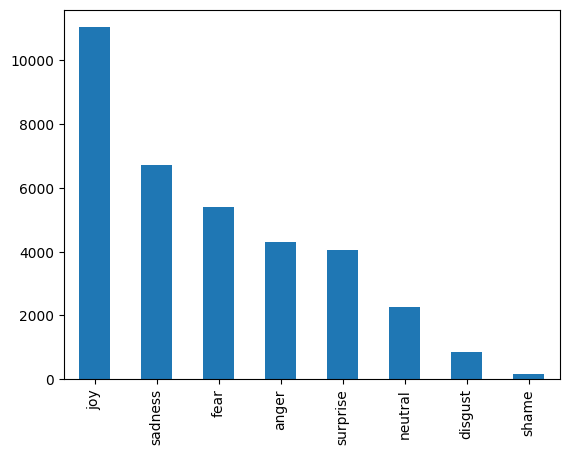

In [453]:
data['Emotion'].value_counts().plot(kind='bar')

In [454]:
#Exploration
#sentiment analysis,keyword extraction-key word for eat emotion ,wordcloud


In [455]:
#sentiment analysis
from textblob import TextBlob

In [456]:
def get_sentiment(text):
  blob =TextBlob(text)
  sentiment=blob.sentiment.polarity
  if sentiment>0:
    result = "Positive"
  elif sentiment<0:
    result="Negative"
  else:
    result="Neutral"
  return result

In [457]:
get_sentiment("I am good girl")

'Positive'

In [458]:
data['Sentiment']=data['Text'].apply(get_sentiment)


In [459]:
data.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [460]:
#compare emotion vs sentiment
data.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

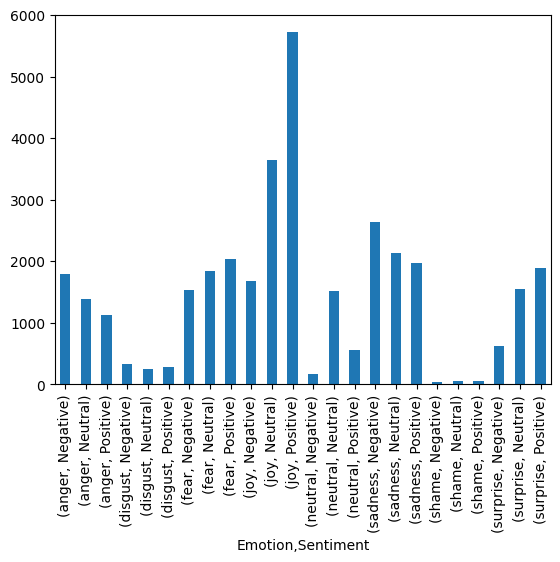

In [461]:
data.groupby(['Emotion','Sentiment']).size().plot(kind='bar')



```

```
###Text cleaning
Remove noise(stopwords,special characteristics,punctuations,emojis)


In [463]:
#keyword extraction
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [464]:
data['Clean_Text']=data['Text'].apply(nfx.remove_stopwords)
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_userhandles)
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_punctuations)
data[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [465]:
#keyword extraction -extract most commin words per class of emotion
!pip install collections
from collections import Counter


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [506]:
def extract_keywords(text,num=50):
  tokens=[tok for tok in text.split()]
  most_common_tokens=Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [507]:
#list of emotions
emotion_list=data['Emotion'].unique().tolist()

In [508]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [509]:
joy_list=data[data['Emotion']=='joy']['Clean_Text']

In [510]:
#joy document
joy_list = [str(item) for item in joy_list]
joy_docx=' '.join(joy_list)

In [511]:
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [512]:
#Extract keywords
keywords_joy=extract_keywords(joy_docx)

In [513]:
keywords_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [474]:
def plot_most_common_words(mydict,emotion_name):
  df_01=pd.DataFrame(mydict.items(),columns=['token','count'])
  plt.figure(figsize=(20,10))
  plt.title("Plot of{} Most Common Keywords".format(emotion_name))
  sns.barplot(x='token',y='count',data=df_01)
  plt.xticks(rotation=45)
  plt.show

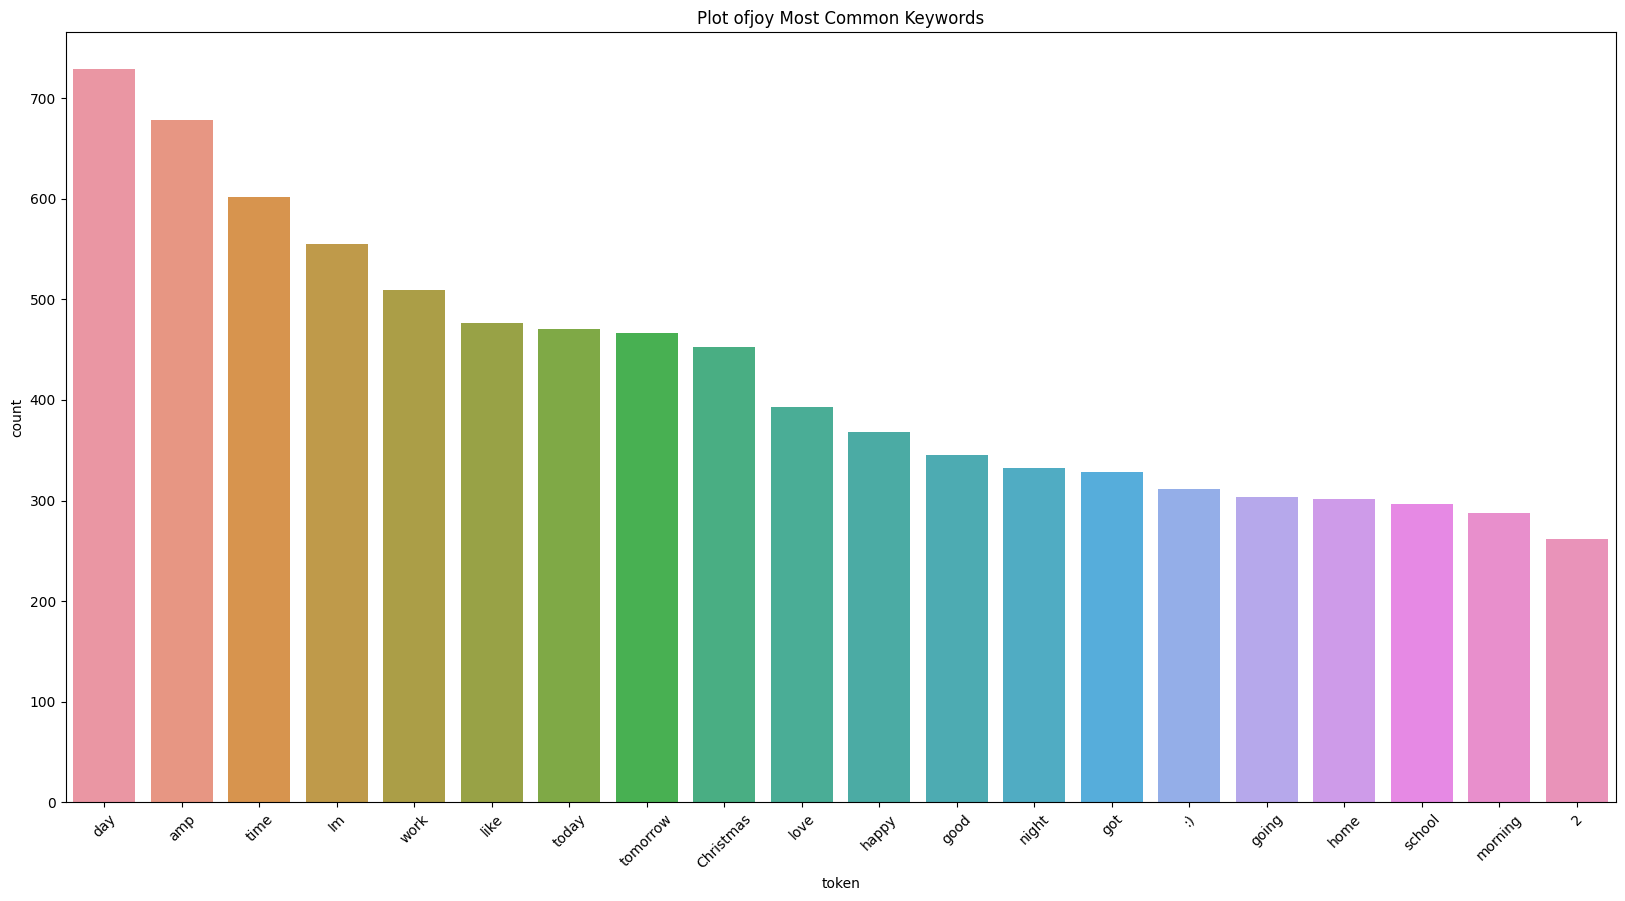

In [475]:
plot_most_common_words(keywords_joy,"joy")

In [476]:
surprise_list=data[data['Emotion']=='surprise']['Clean_Text']

In [477]:
#surprise document
surprise_list = [str(item) for item in surprise_list]
surprise_docx=' '.join(surprise_list)
#Extract keywords
keywords_surprise=extract_keywords(surprise_docx)

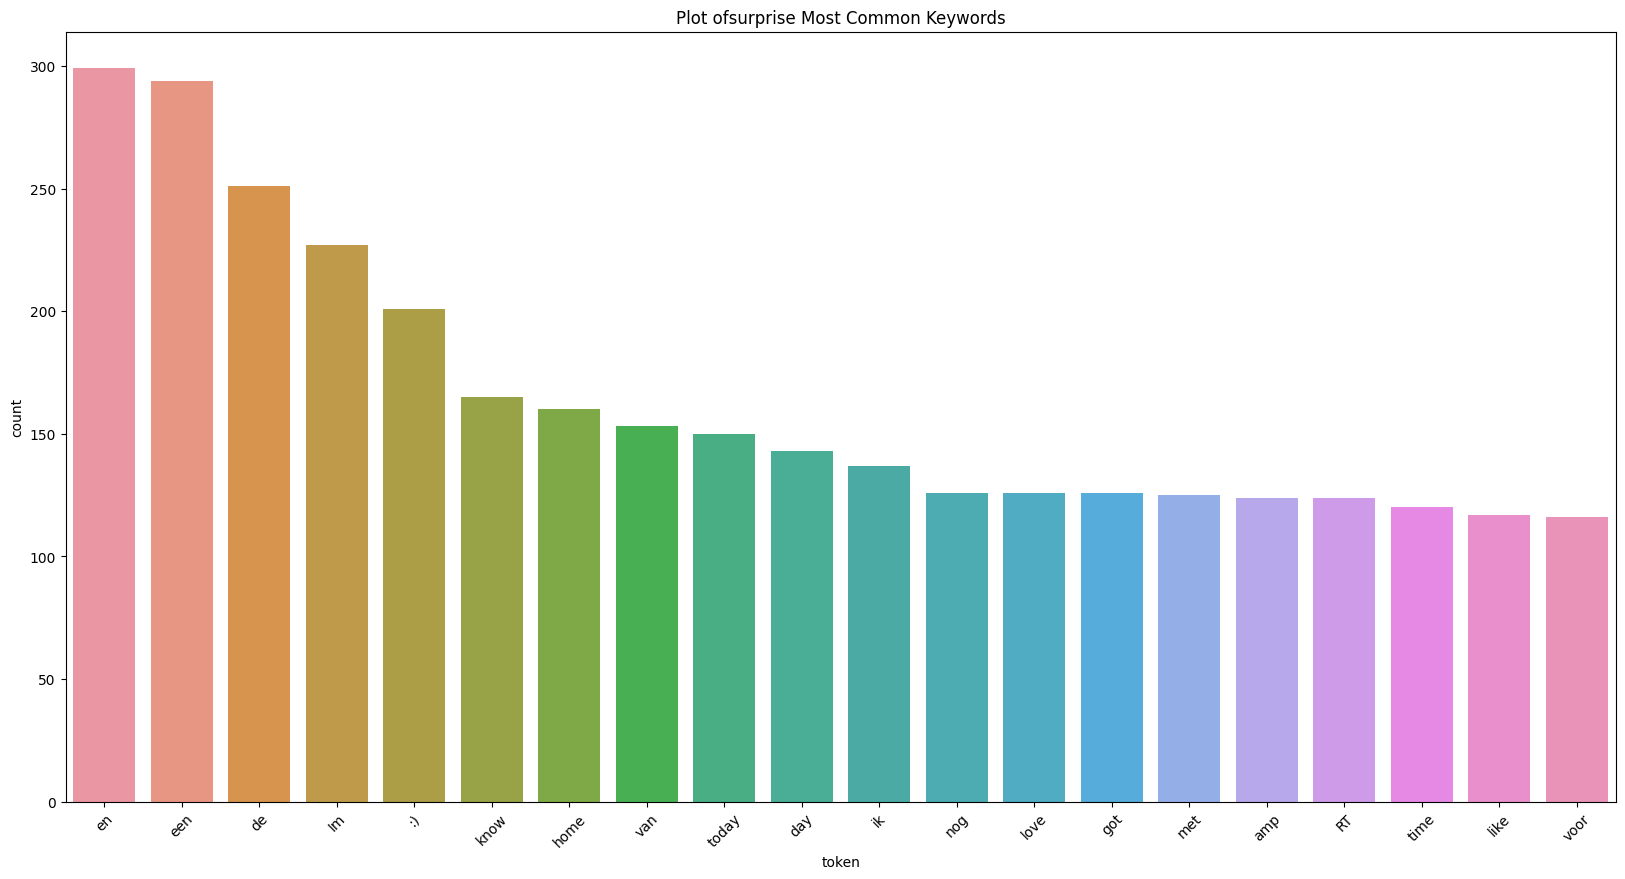

In [478]:
plot_most_common_words(keywords_surprise,"surprise")

In [479]:
from wordcloud import WordCloud
def plot_wordcloud(docx):
  mywordcloud=WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='bilinear')
  #plt.axis("off")
  plt.show()

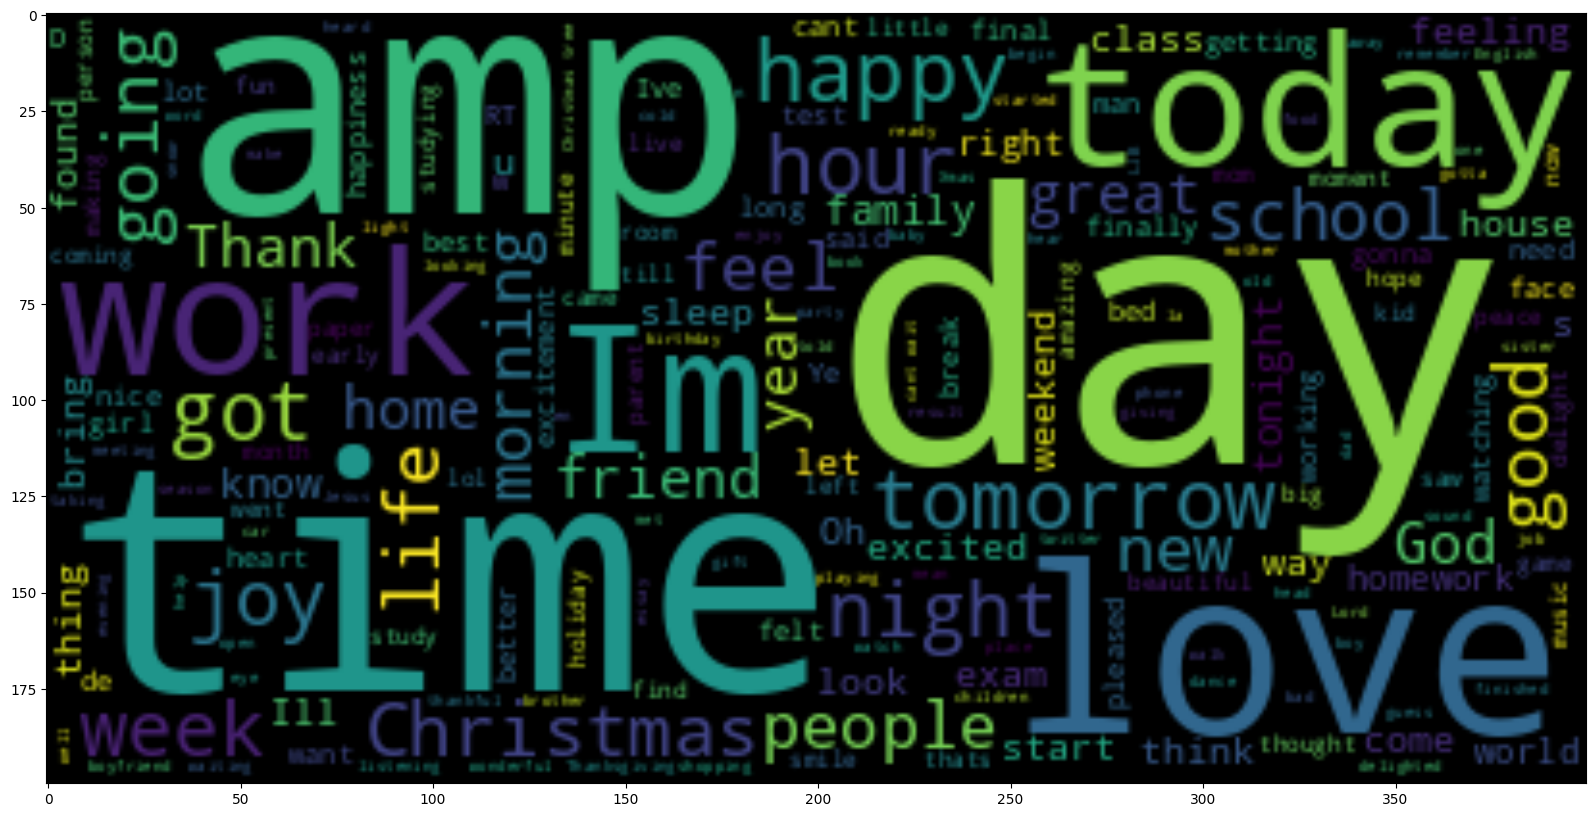

In [480]:
plot_wordcloud(joy_docx)


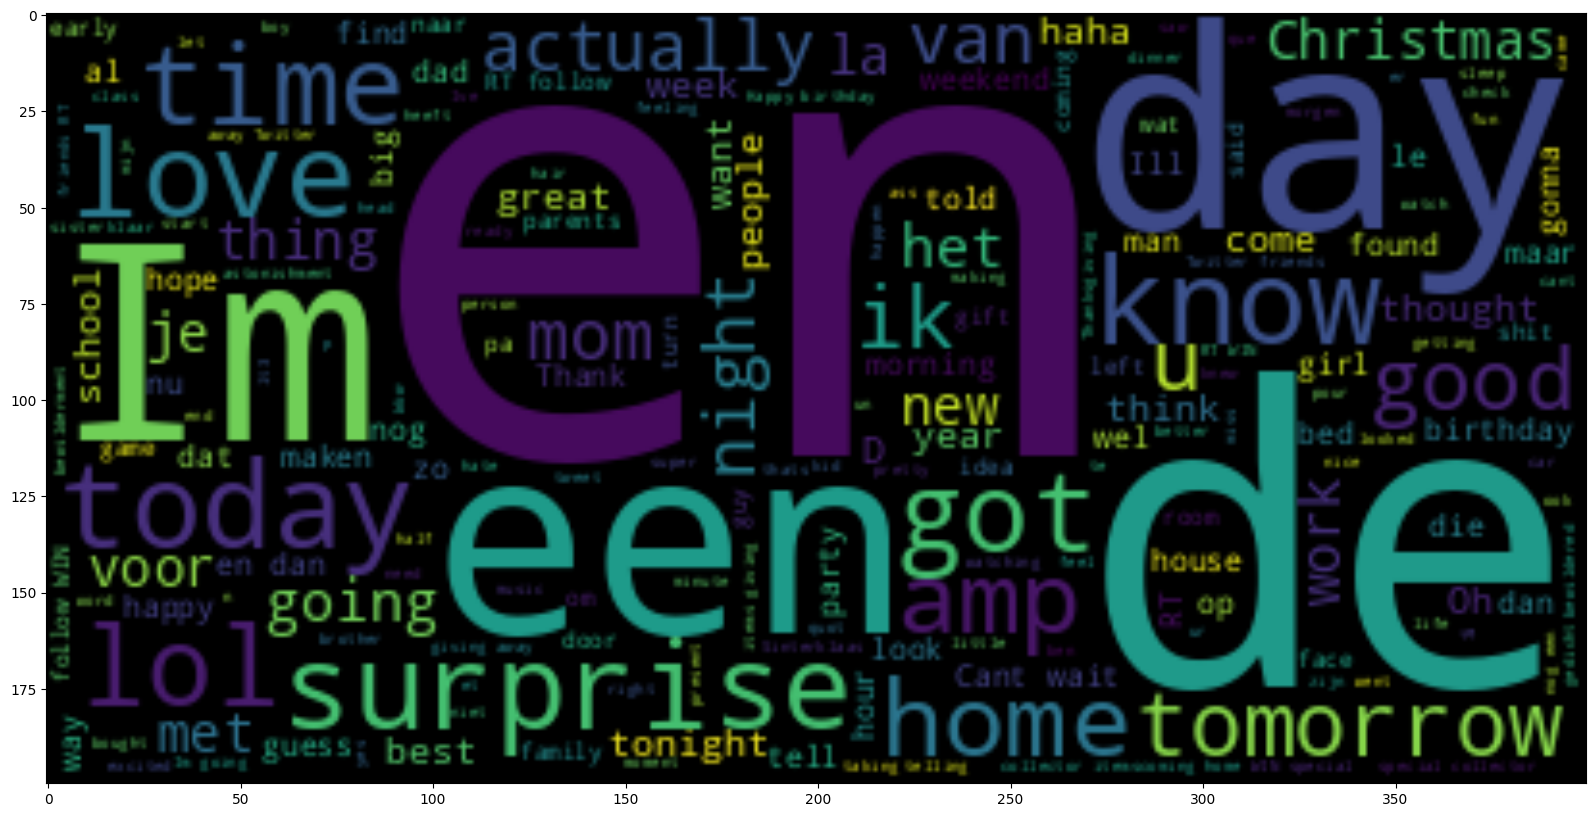

In [481]:
plot_wordcloud(surprise_docx)

In [482]:
##Machine Learning(Naivebayes,Logistic Regression,KNN,Decision Tree)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [483]:
from sklearn.model_selection import train_test_split

###Build fetaures from our Text

In [485]:
Xfeatures=data['Clean_Text']
ylabels=data["Emotion"]

In [486]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [487]:
#vectorizer
cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [489]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [490]:
#Split Dataset
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [491]:
#Build our model
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [492]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


svc = SVC()
lsvc = LinearSVC(random_state=123)
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()

clifs = [svc, lsvc, rforest, dtree]
def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc

# train and test them
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs:
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |
| SVC                       |         0.8755851 |     0.6107492 |


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


| LinearSVC                 |         0.9564753 |     0.6073002 |
| RandomForestClassifier    |         0.9951137 |     0.5801878 |
| DecisionTreeClassifier    |         0.9951137 |     0.5423453 |


In [493]:
nv_model.score(X_test,y_test)

0.5642843456600881

In [494]:
y_pred_for_nv=nv_model.predict(X_test)

In [495]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

In [496]:
#Make a single prediction(vectorized or text,applied our model)
sample_text=['I love coding']

In [497]:
def predict_emotion(sample_text,model):
  myvect=cv.transform(sample_text).toarray()
  prediction=model.predict(myvect)
  pred_proba=model.predict_proba(myvect)
  pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
  print("Prediction : {}, Prediction Score : {}".format(prediction[0],np.max(pred_proba)))
  return pred_percentage_for_all

In [498]:
predict_emotion(sample_text,nv_model)

Prediction : joy, Prediction Score : 0.6096036543071133


{'anger': 0.017524725608633402,
 'disgust': 0.002534617839610933,
 'fear': 0.14986249286163555,
 'joy': 0.6096036543071133,
 'neutral': 0.0063551844797581185,
 'sadness': 0.12262359580322878,
 'shame': 4.674673665660831e-05,
 'surprise': 0.0914489823633635}

In [499]:
#Model Evaluation
#calssification
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [500]:
#confusion
confusion_matrix(y_test,y_pred_for_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]])

In [501]:
#plot confusion matrix
#!pip install -U scikit-learn
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(nv_model,X_test,y_test)

In [502]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [503]:
lr_model.score(X_test,y_test)

0.622341444721211

In [504]:
predict_emotion(["I'm so happy."],lr_model)

Prediction : joy, Prediction Score : 0.8230332250891975


{'anger': 0.011649200509069419,
 'disgust': 0.005107415659459995,
 'fear': 0.02205579437063019,
 'joy': 0.8230332250891975,
 'neutral': 0.028332213445839777,
 'sadness': 0.06952576879034837,
 'shame': 0.0007867761159821373,
 'surprise': 0.03950960601947256}